# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t60_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,139.855275,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
0,1417.0,1797.0,2201.0,2423.0,2714.0,2943.0,3082.0,3365.0,3445.0,3930.0,...,5897.0,5797.0,5718.0,5820.0,5782.0,5889.0,5548.0,5972.0,5886.0,5864.0
1,1444.0,1872.0,2323.0,2620.0,2821.0,3020.0,3152.0,3363.0,3522.0,3890.0,...,6052.0,5938.0,5991.0,5996.0,6005.0,6030.0,5861.0,6039.0,5830.0,6116.0
2,1486.0,1890.0,2300.0,2524.0,2795.0,3022.0,3261.0,3605.0,3669.0,3847.0,...,6039.0,6128.0,6059.0,6053.0,5955.0,5945.0,5912.0,5995.0,5971.0,6007.0
3,1503.0,1878.0,2409.0,2651.0,2836.0,3083.0,3282.0,3494.0,3649.0,4037.0,...,6107.0,6228.0,6123.0,6068.0,6112.0,6091.0,5943.0,5913.0,6096.0,5993.0
4,1519.0,1888.0,2343.0,2656.0,2912.0,2946.0,3290.0,3558.0,3745.0,3956.0,...,6250.0,6188.0,6291.0,6213.0,6198.0,6219.0,6002.0,6112.0,5991.0,6069.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,603.0,746.0,811.0,895.0,1058.0,1065.0,1140.0,1225.0,1305.0,1360.0,...,1651.0,1640.0,1632.0,1601.0,1564.0,1589.0,1583.0,1699.0,1666.0,1639.0
693,605.0,782.0,840.0,1002.0,1025.0,1169.0,1156.0,1260.0,1285.0,1377.0,...,1706.0,1657.0,1550.0,1790.0,1609.0,1609.0,1586.0,1665.0,1541.0,1803.0
694,605.0,719.0,951.0,933.0,1050.0,1114.0,1217.0,1249.0,1243.0,1432.0,...,1511.0,1587.0,1611.0,1571.0,1592.0,1681.0,1715.0,1671.0,1650.0,1729.0
695,632.0,691.0,957.0,1004.0,1045.0,1020.0,1200.0,1222.0,1319.0,1316.0,...,1561.0,1553.0,1601.0,1746.0,1570.0,1652.0,1567.0,1738.0,1660.0,1753.0


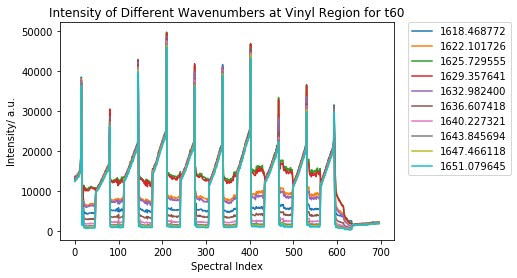

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t60')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1629.357641'] --> When using loc.
# df.columns.get_loc('1629.357641') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.357641'. Use relevant parameter for iloc and loc respectively.

# Filter Relevant Spectra

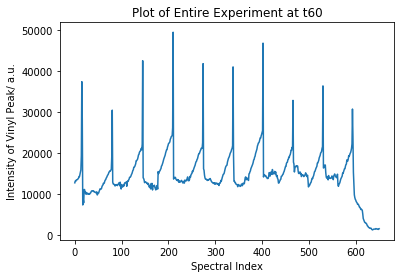

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:650,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t60')
plt.show()

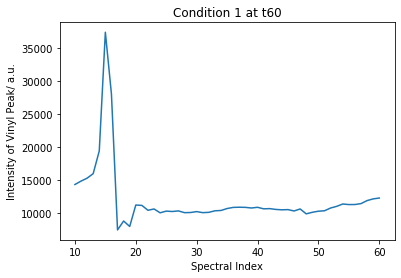

In [6]:
# Condition
df.loc[10:60,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 at t60')
plt.show()

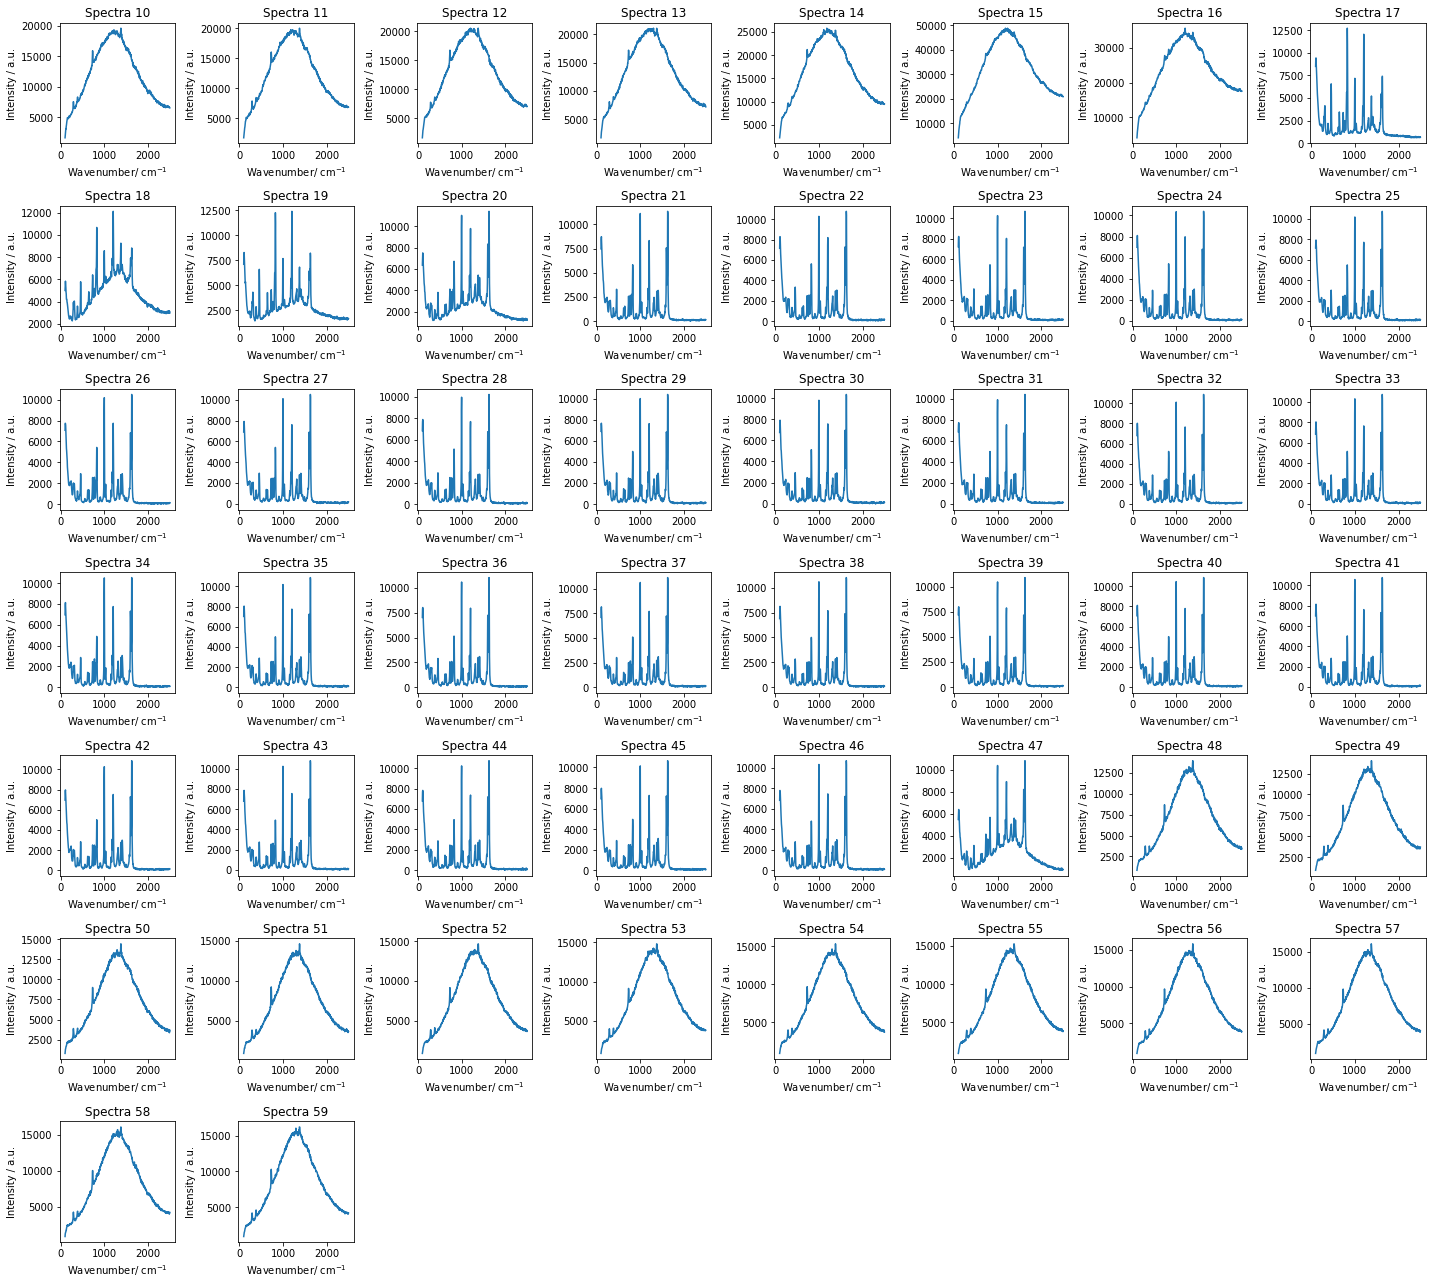

In [7]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(10, 60):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-9))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [8]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[30:39, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =10)
condition1_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
30,10,6743.0,7525.0,7902.0,7515.0,6888.0,6328.0,5620.0,5133.0,5020.0,...,56.0,128.0,55.0,185.0,118.0,146.0,60.0,112.0,119.0,119.0
31,10,6867.0,7522.0,7727.0,7552.0,6892.0,6280.0,5701.0,5322.0,4883.0,...,131.0,71.0,83.0,113.0,103.0,86.0,86.0,144.0,87.0,104.0
32,10,6795.0,7669.0,8008.0,7693.0,6802.0,6193.0,5786.0,5405.0,5086.0,...,110.0,133.0,93.0,156.0,122.0,84.0,82.0,74.0,130.0,140.0
33,10,6848.0,7864.0,8034.0,7616.0,7081.0,6524.0,5877.0,5433.0,4991.0,...,82.0,125.0,45.0,114.0,56.0,125.0,77.0,149.0,80.0,100.0
34,10,6953.0,7902.0,8122.0,7688.0,7021.0,6575.0,5973.0,5480.0,5131.0,...,107.0,117.0,72.0,116.0,115.0,100.0,95.0,101.0,141.0,78.0
35,10,7033.0,7806.0,8053.0,7765.0,7193.0,6593.0,5917.0,5431.0,5361.0,...,122.0,149.0,91.0,172.0,114.0,148.0,79.0,66.0,99.0,106.0
36,10,7034.0,7913.0,8029.0,7836.0,7301.0,6548.0,5866.0,5507.0,5158.0,...,93.0,126.0,55.0,147.0,47.0,79.0,54.0,132.0,95.0,104.0
37,10,7088.0,7906.0,8152.0,7697.0,7124.0,6562.0,5906.0,5636.0,5124.0,...,147.0,164.0,58.0,134.0,71.0,163.0,69.0,117.0,98.0,119.0
38,10,6894.0,7912.0,8117.0,7766.0,7013.0,6573.0,5953.0,5500.0,5014.0,...,126.0,158.0,31.0,180.0,53.0,95.0,90.0,119.0,113.0,124.0
39,10,7214.0,7867.0,8001.0,7602.0,7117.0,6559.0,6023.0,5659.0,5079.0,...,79.0,139.0,155.0,100.0,53.0,102.0,97.0,66.0,100.0,137.0


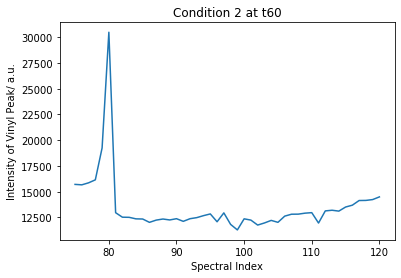

In [9]:
# Condition
df.loc[75:120,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2 at t60')
plt.show()

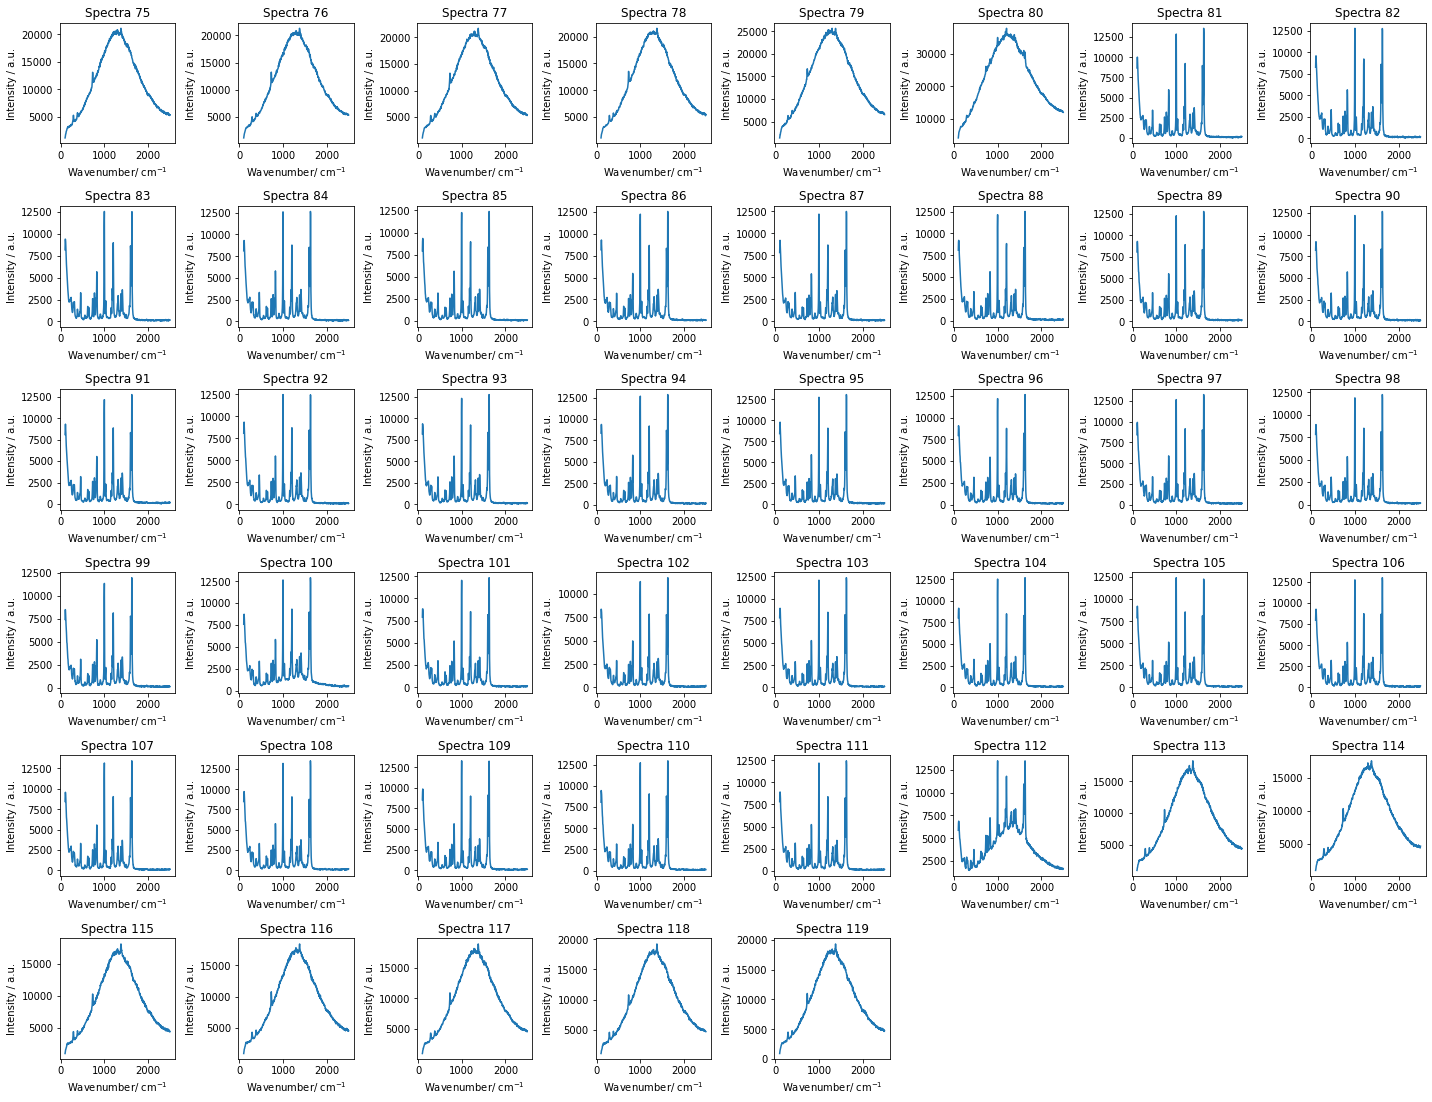

In [10]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(75, 120):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-74))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[100:109, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =11)
condition2_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
100,11,7586.0,8687.0,8723.0,8366.0,7724.0,7104.0,6397.0,6003.0,5507.0,...,518.0,552.0,475.0,541.0,533.0,530.0,446.0,487.0,469.0,542.0
101,11,7891.0,8797.0,8828.0,8586.0,7957.0,7113.0,6644.0,5920.0,5457.0,...,125.0,138.0,98.0,83.0,71.0,80.0,47.0,145.0,72.0,119.0
102,11,7484.0,8388.0,8298.0,8027.0,7461.0,6989.0,6359.0,5864.0,5351.0,...,142.0,173.0,80.0,167.0,100.0,150.0,101.0,131.0,111.0,211.0
103,11,7843.0,8721.0,8900.0,8719.0,7858.0,7125.0,6637.0,6294.0,5800.0,...,95.0,89.0,100.0,122.0,128.0,119.0,73.0,108.0,92.0,112.0
104,11,8026.0,8926.0,9139.0,8546.0,8045.0,7444.0,6775.0,6189.0,5975.0,...,130.0,89.0,24.0,149.0,111.0,78.0,62.0,65.0,105.0,95.0
105,11,7895.0,8719.0,9195.0,8829.0,7996.0,7304.0,6546.0,6090.0,5670.0,...,100.0,168.0,97.0,72.0,109.0,123.0,59.0,95.0,61.0,119.0
106,11,7969.0,9118.0,9271.0,9105.0,8354.0,7645.0,6880.0,6398.0,6038.0,...,135.0,167.0,46.0,151.0,69.0,160.0,38.0,159.0,107.0,151.0
107,11,8443.0,9500.0,9564.0,9399.0,8664.0,7824.0,7160.0,6532.0,6262.0,...,126.0,134.0,86.0,170.0,83.0,157.0,131.0,179.0,122.0,154.0
108,11,8477.0,9538.0,9704.0,9387.0,8689.0,7990.0,7381.0,6688.0,6054.0,...,141.0,126.0,107.0,157.0,106.0,92.0,85.0,157.0,115.0,145.0
109,11,8544.0,9490.0,9865.0,9509.0,8396.0,7957.0,7215.0,6600.0,6039.0,...,157.0,128.0,103.0,172.0,127.0,112.0,102.0,127.0,109.0,127.0


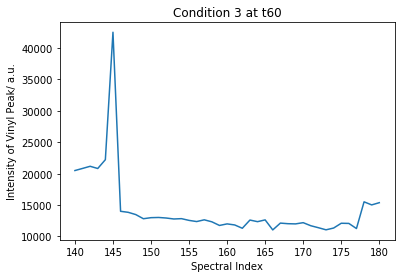

In [12]:
# Condition
df.loc[140:180,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3 at t60')
plt.show()

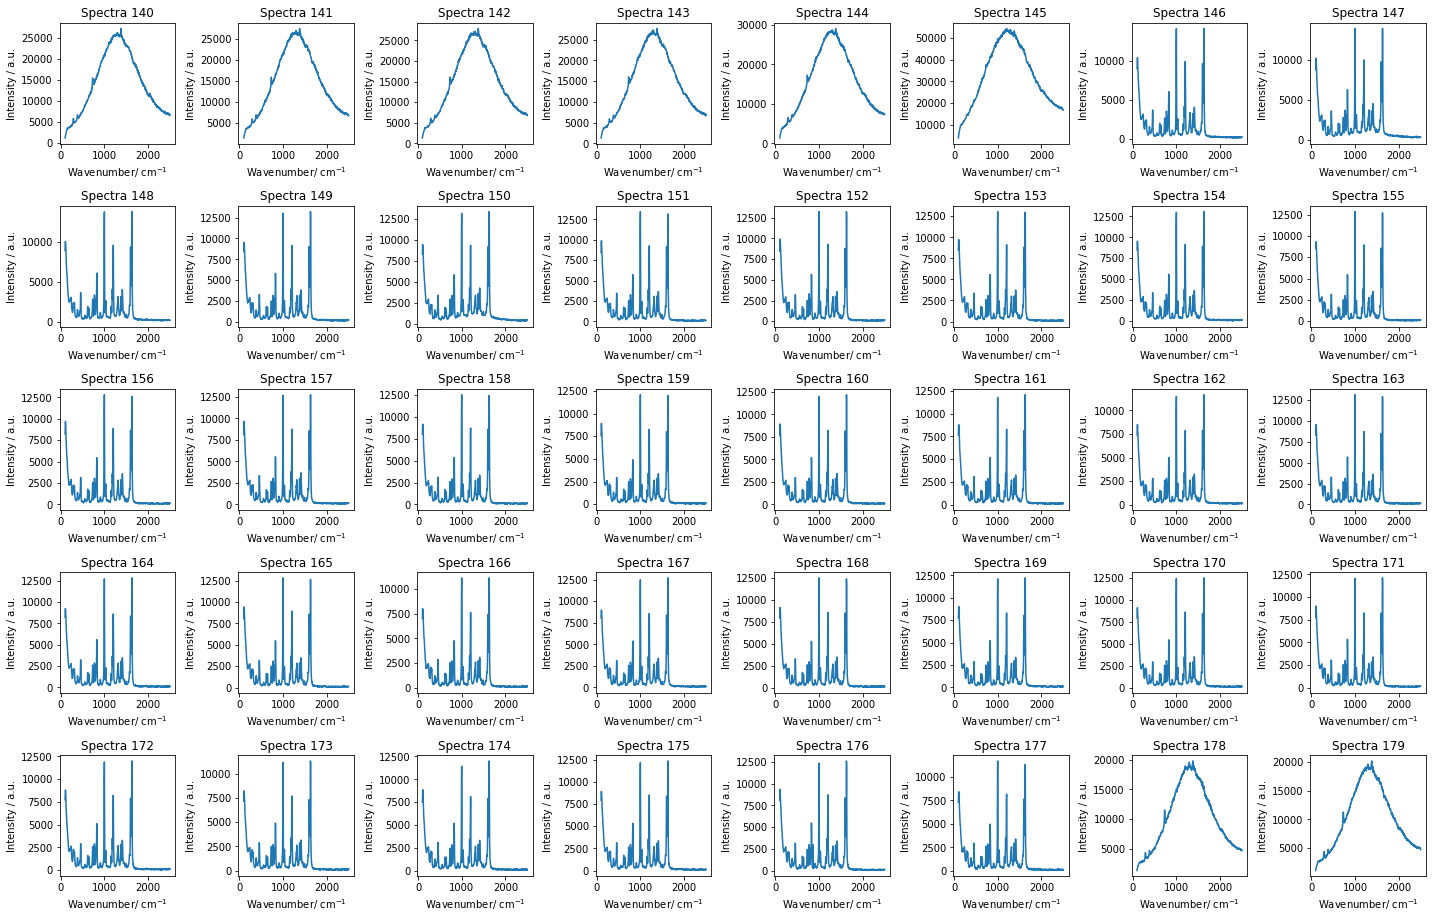

In [13]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(140, 180):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-139))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [14]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[166:175, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =12)
condition3_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
166,12,7025.0,8008.0,7919.0,7831.0,7059.0,6553.0,6074.0,5682.0,5080.0,...,167.0,209.0,152.0,215.0,161.0,174.0,91.0,175.0,148.0,207.0
167,12,8076.0,8845.0,8967.0,8827.0,8094.0,7498.0,6767.0,6187.0,5815.0,...,113.0,167.0,115.0,161.0,132.0,190.0,56.0,125.0,156.0,130.0
168,12,7950.0,8909.0,9154.0,8743.0,8288.0,7374.0,6810.0,6232.0,5815.0,...,156.0,124.0,102.0,201.0,59.0,153.0,81.0,154.0,158.0,112.0
169,12,7780.0,8615.0,9012.0,8465.0,7729.0,7124.0,6569.0,6034.0,5512.0,...,131.0,148.0,91.0,197.0,97.0,151.0,63.0,111.0,110.0,102.0
170,12,7923.0,8892.0,9094.0,8568.0,7992.0,7332.0,6814.0,6274.0,5633.0,...,158.0,159.0,175.0,228.0,110.0,156.0,114.0,164.0,111.0,172.0
171,12,7733.0,8650.0,9001.0,8532.0,7800.0,7127.0,6533.0,6069.0,5673.0,...,143.0,175.0,151.0,149.0,157.0,138.0,112.0,148.0,155.0,173.0
172,12,7748.0,8447.0,8795.0,8532.0,7618.0,7127.0,6391.0,6080.0,5604.0,...,144.0,159.0,105.0,206.0,106.0,123.0,131.0,153.0,83.0,152.0
173,12,7178.0,8196.0,8246.0,7899.0,7439.0,6653.0,6187.0,5561.0,5387.0,...,138.0,162.0,80.0,162.0,150.0,145.0,140.0,172.0,89.0,157.0
174,12,7535.0,8290.0,8855.0,8224.0,7689.0,6969.0,6474.0,5923.0,5635.0,...,155.0,196.0,101.0,178.0,81.0,155.0,83.0,200.0,146.0,142.0
175,12,7930.0,8925.0,8890.0,8713.0,7855.0,7273.0,6758.0,6201.0,5807.0,...,129.0,131.0,120.0,154.0,84.0,91.0,123.0,144.0,175.0,118.0


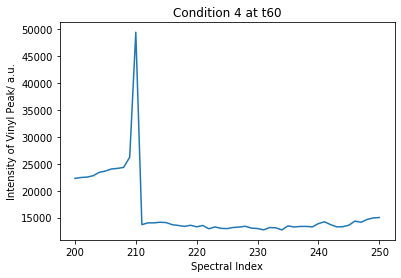

In [15]:
# Condition
df.loc[200:250,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4 at t60')
plt.show()

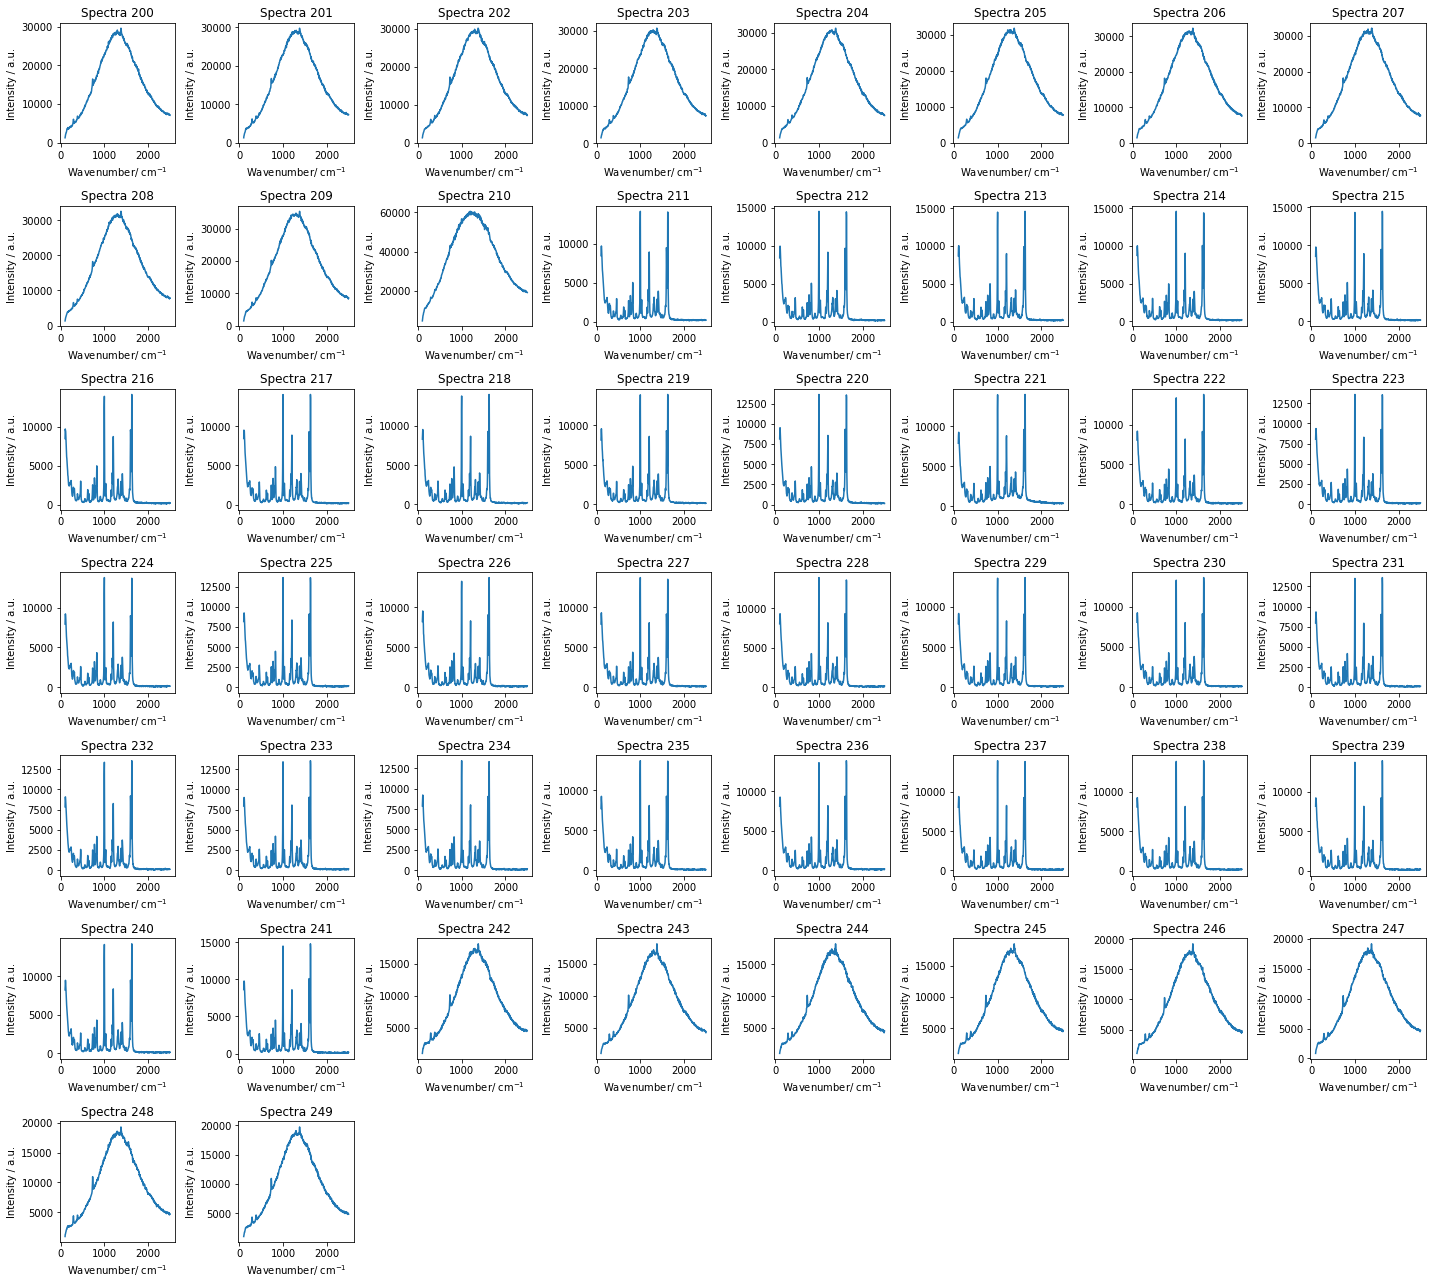

In [16]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(200, 250):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-199))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[230:239, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =13)
condition4_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
230,13,8085.0,8908.0,9263.0,8813.0,8039.0,7676.0,6778.0,6279.0,6083.0,...,138.0,149.0,92.0,114.0,98.0,94.0,68.0,159.0,57.0,100.0
231,13,7979.0,8945.0,9345.0,8911.0,8264.0,7621.0,6854.0,6316.0,5891.0,...,141.0,103.0,146.0,132.0,81.0,104.0,77.0,132.0,124.0,128.0
232,13,7850.0,9045.0,9087.0,8735.0,8179.0,7439.0,6917.0,6246.0,5968.0,...,137.0,130.0,120.0,138.0,95.0,135.0,101.0,148.0,146.0,118.0
233,13,7956.0,8852.0,9010.0,8865.0,8045.0,7365.0,6845.0,6510.0,5840.0,...,146.0,167.0,154.0,150.0,121.0,112.0,58.0,110.0,70.0,151.0
234,13,7879.0,8700.0,9224.0,8723.0,8005.0,7287.0,6680.0,6174.0,5744.0,...,117.0,142.0,115.0,183.0,109.0,130.0,59.0,139.0,98.0,154.0
235,13,7724.0,8834.0,9245.0,8871.0,8330.0,7545.0,6887.0,6315.0,5886.0,...,113.0,136.0,114.0,160.0,29.0,93.0,100.0,98.0,125.0,95.0
236,13,8098.0,9056.0,9250.0,9096.0,8137.0,7540.0,6908.0,6512.0,5946.0,...,105.0,104.0,87.0,121.0,79.0,145.0,58.0,134.0,67.0,118.0
237,13,8022.0,8874.0,9381.0,8810.0,8417.0,7832.0,6984.0,6426.0,5807.0,...,146.0,159.0,60.0,180.0,91.0,146.0,63.0,211.0,162.0,185.0
238,13,8058.0,9183.0,9233.0,8875.0,8368.0,7558.0,7090.0,6596.0,6055.0,...,146.0,164.0,97.0,177.0,151.0,168.0,89.0,170.0,142.0,161.0
239,13,8168.0,9225.0,9153.0,8888.0,8199.0,7509.0,6943.0,6330.0,6253.0,...,176.0,215.0,128.0,180.0,142.0,145.0,104.0,223.0,177.0,190.0


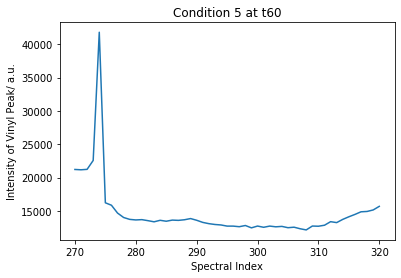

In [18]:
# Condition
df.loc[270:320,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5 at t60')
plt.show()

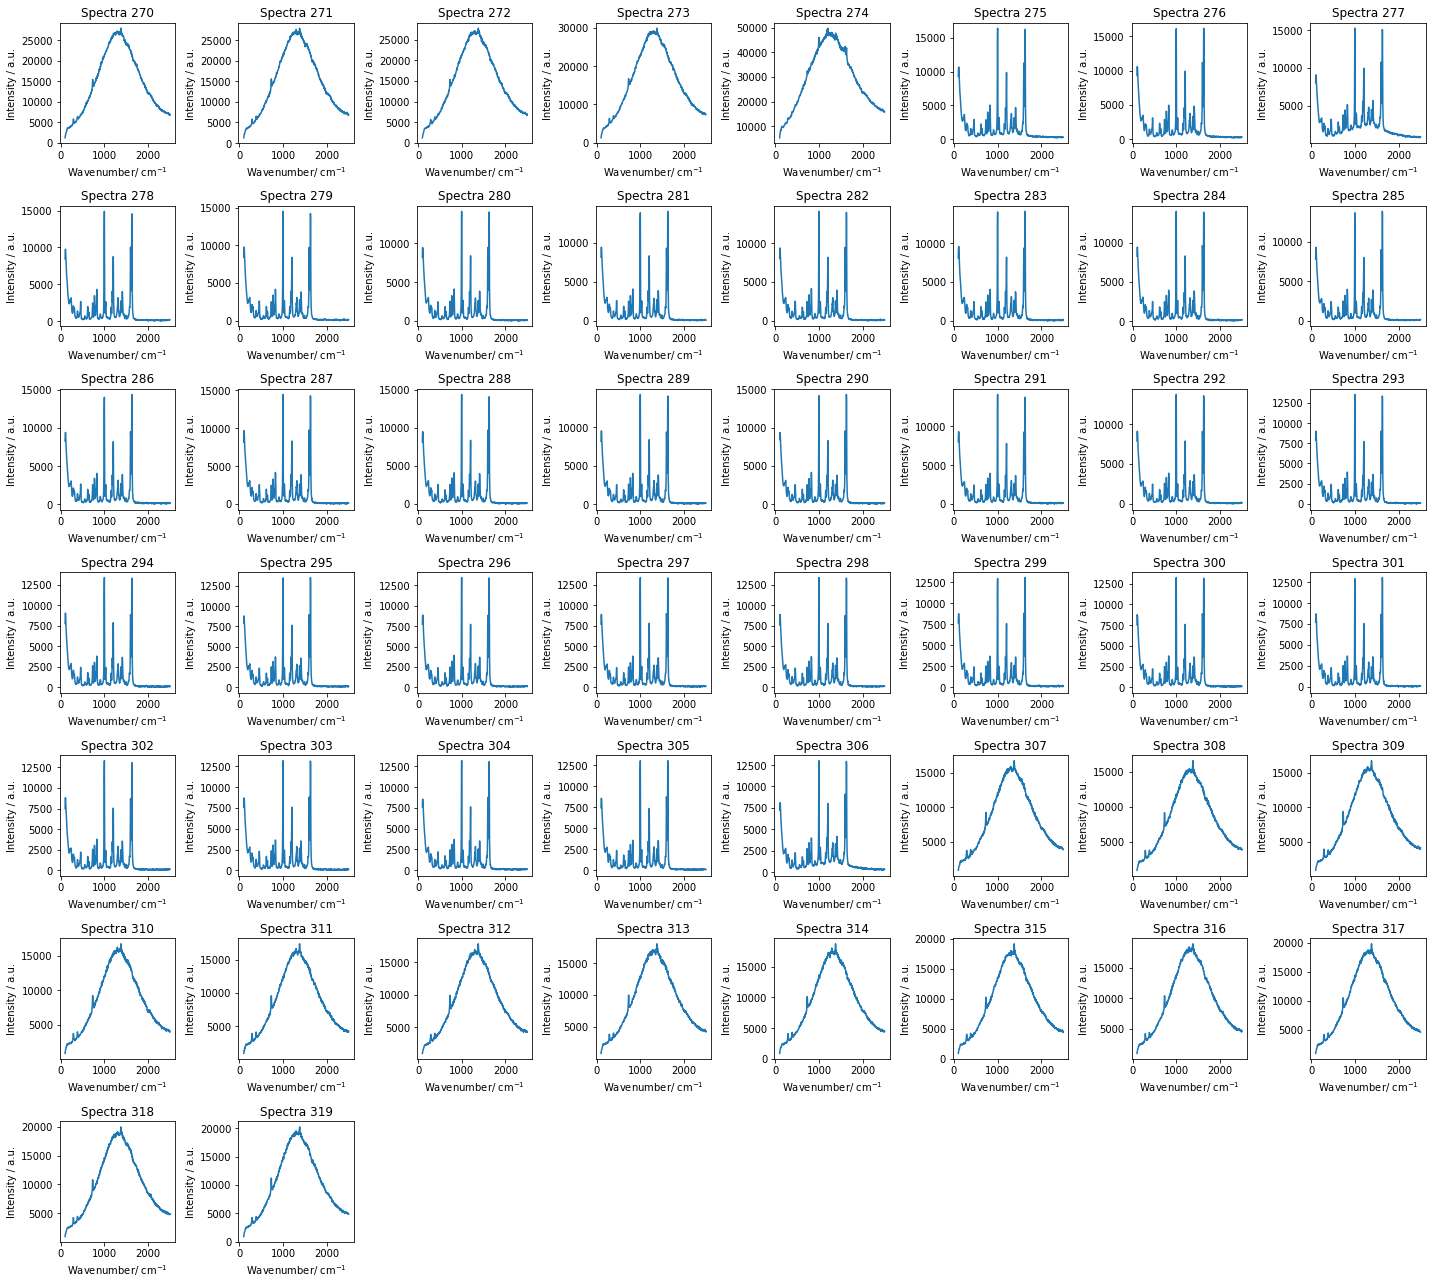

In [19]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(270, 320):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-269))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [20]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[295:304, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =14)
condition5_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
295,14,7932.0,8484.0,8792.0,8334.0,7835.0,7329.0,6709.0,6279.0,5702.0,...,89.0,122.0,79.0,190.0,124.0,85.0,56.0,176.0,136.0,103.0
296,14,7751.0,8682.0,8865.0,8711.0,7914.0,7344.0,6684.0,6219.0,5769.0,...,131.0,196.0,93.0,153.0,144.0,132.0,137.0,195.0,88.0,148.0
297,14,7707.0,8666.0,8899.0,8547.0,8020.0,7262.0,6715.0,6252.0,5818.0,...,159.0,172.0,107.0,167.0,99.0,96.0,98.0,126.0,110.0,126.0
298,14,7613.0,8491.0,8868.0,8555.0,7795.0,7335.0,6736.0,6157.0,5692.0,...,115.0,144.0,111.0,141.0,140.0,102.0,86.0,142.0,133.0,121.0
299,14,7682.0,8623.0,8742.0,8301.0,7738.0,7190.0,6452.0,6174.0,5674.0,...,119.0,102.0,72.0,199.0,56.0,150.0,50.0,125.0,107.0,153.0
300,14,7553.0,8745.0,8676.0,8495.0,7785.0,7194.0,6596.0,6201.0,5822.0,...,87.0,199.0,111.0,171.0,106.0,125.0,95.0,125.0,92.0,122.0
301,14,7728.0,8294.0,8711.0,8394.0,7938.0,6888.0,6414.0,6081.0,5645.0,...,152.0,140.0,107.0,184.0,97.0,106.0,105.0,91.0,102.0,124.0
302,14,7511.0,8427.0,8817.0,8307.0,7930.0,7098.0,6527.0,6017.0,5695.0,...,109.0,198.0,116.0,186.0,109.0,169.0,116.0,155.0,167.0,155.0
303,14,7564.0,8496.0,8706.0,8445.0,7664.0,7274.0,6559.0,6079.0,5584.0,...,155.0,164.0,122.0,157.0,125.0,125.0,93.0,189.0,136.0,124.0
304,14,7641.0,8428.0,8540.0,8227.0,7761.0,7135.0,6434.0,6084.0,5658.0,...,123.0,108.0,63.0,114.0,107.0,88.0,90.0,120.0,102.0,118.0


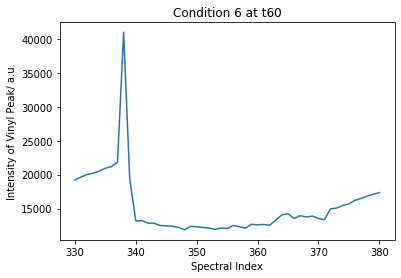

In [21]:
# Condition
df.loc[330:380,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6 at t60')
plt.show()

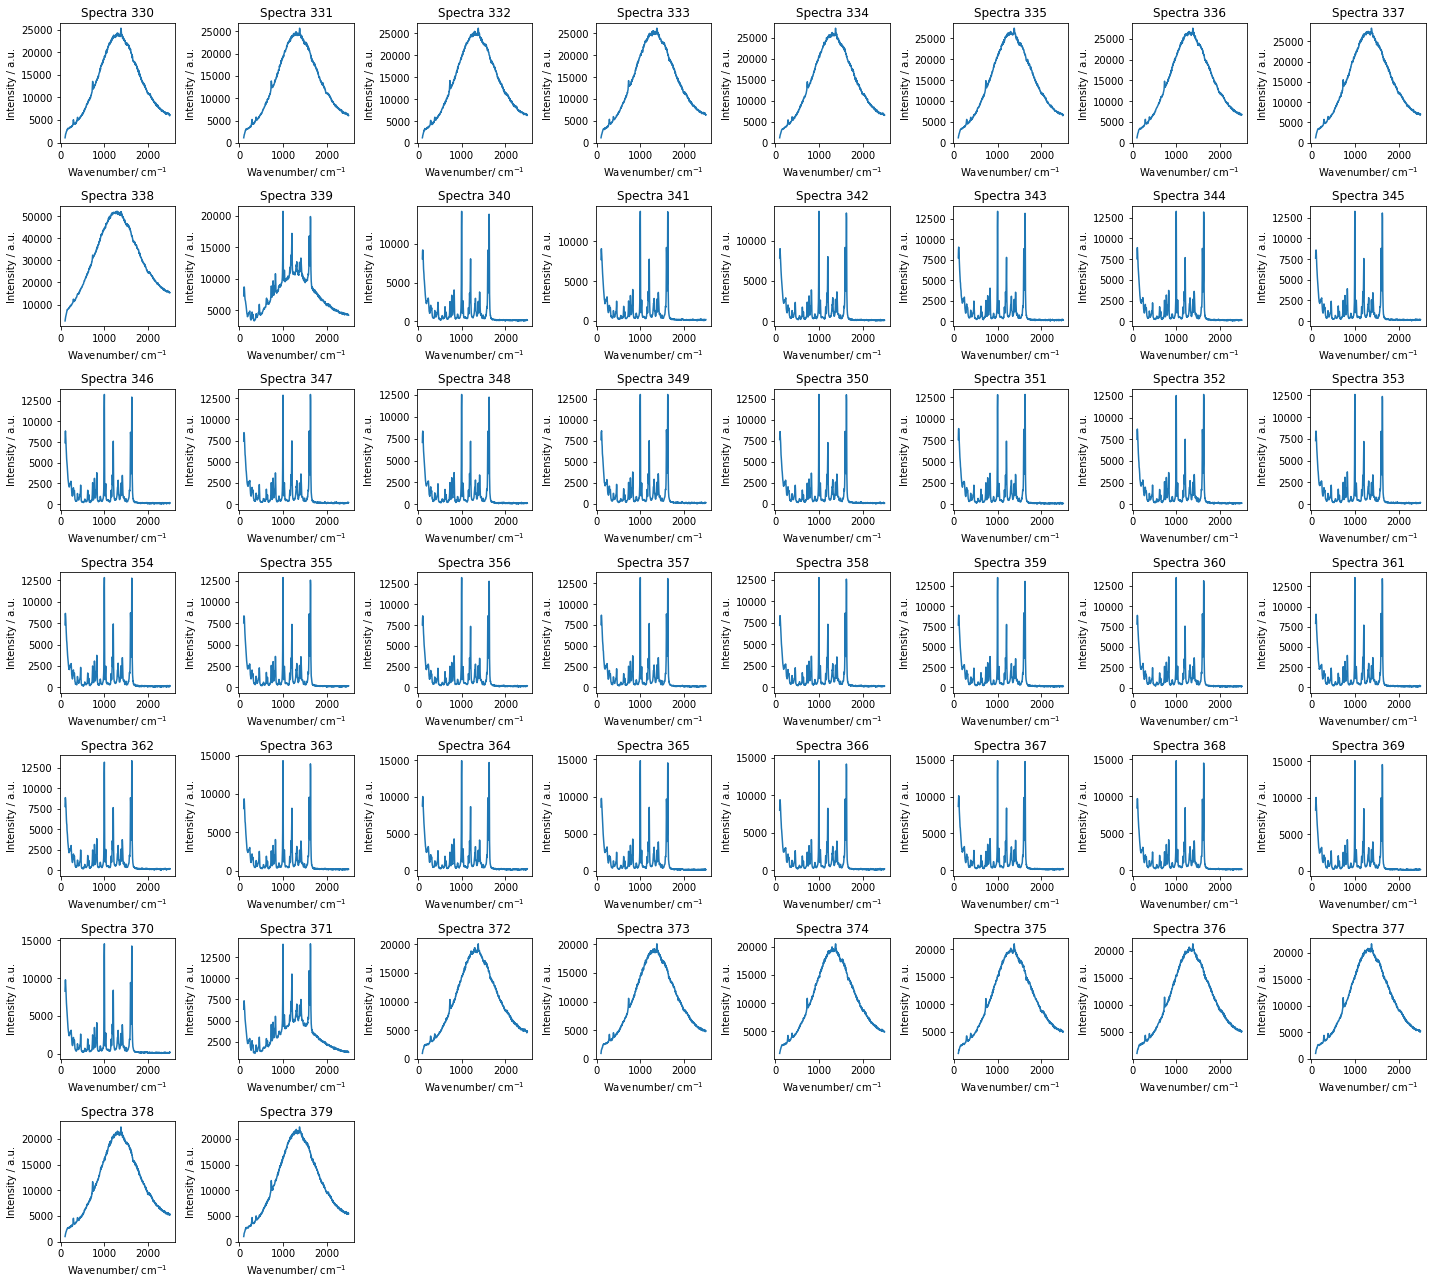

In [22]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(330, 380):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-329))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[350:359, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =15)
condition6_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
350,15,7652.0,8449.0,8596.0,8209.0,7642.0,7241.0,6462.0,5853.0,5586.0,...,62.0,174.0,68.0,172.0,119.0,134.0,42.0,145.0,92.0,105.0
351,15,7558.0,8721.0,8848.0,8274.0,7643.0,7080.0,6481.0,5779.0,5518.0,...,157.0,141.0,58.0,162.0,136.0,143.0,75.0,136.0,148.0,127.0
352,15,7491.0,8468.0,8668.0,8363.0,7657.0,7202.0,6293.0,5912.0,5383.0,...,130.0,172.0,100.0,140.0,153.0,145.0,113.0,114.0,127.0,137.0
353,15,7308.0,8153.0,8397.0,8137.0,7448.0,6717.0,6332.0,5922.0,5542.0,...,116.0,171.0,121.0,186.0,135.0,161.0,115.0,194.0,135.0,181.0
354,15,7300.0,8585.0,8629.0,8292.0,7588.0,7027.0,6453.0,5896.0,5469.0,...,102.0,145.0,112.0,210.0,94.0,108.0,83.0,159.0,116.0,198.0
355,15,7551.0,8368.0,8329.0,8265.0,7549.0,6889.0,6410.0,5844.0,5559.0,...,178.0,160.0,155.0,160.0,155.0,141.0,132.0,179.0,130.0,181.0
356,15,7526.0,8338.0,8620.0,8363.0,7701.0,7057.0,6497.0,6106.0,5464.0,...,159.0,168.0,130.0,205.0,128.0,105.0,112.0,141.0,139.0,174.0
357,15,7535.0,8403.0,8667.0,8395.0,7757.0,7059.0,6507.0,6021.0,5555.0,...,166.0,124.0,164.0,186.0,157.0,108.0,121.0,143.0,145.0,156.0
358,15,7222.0,8207.0,8348.0,8053.0,7512.0,6771.0,6507.0,5810.0,5450.0,...,166.0,155.0,154.0,153.0,145.0,159.0,105.0,143.0,158.0,146.0
359,15,7681.0,8572.0,8903.0,8383.0,8024.0,7354.0,6632.0,6035.0,5774.0,...,153.0,173.0,110.0,216.0,124.0,180.0,73.0,131.0,125.0,134.0


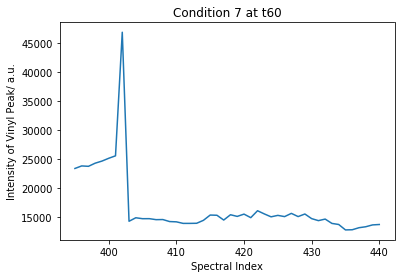

In [24]:
# Condition
df.loc[395:440,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7 at t60')
plt.show()

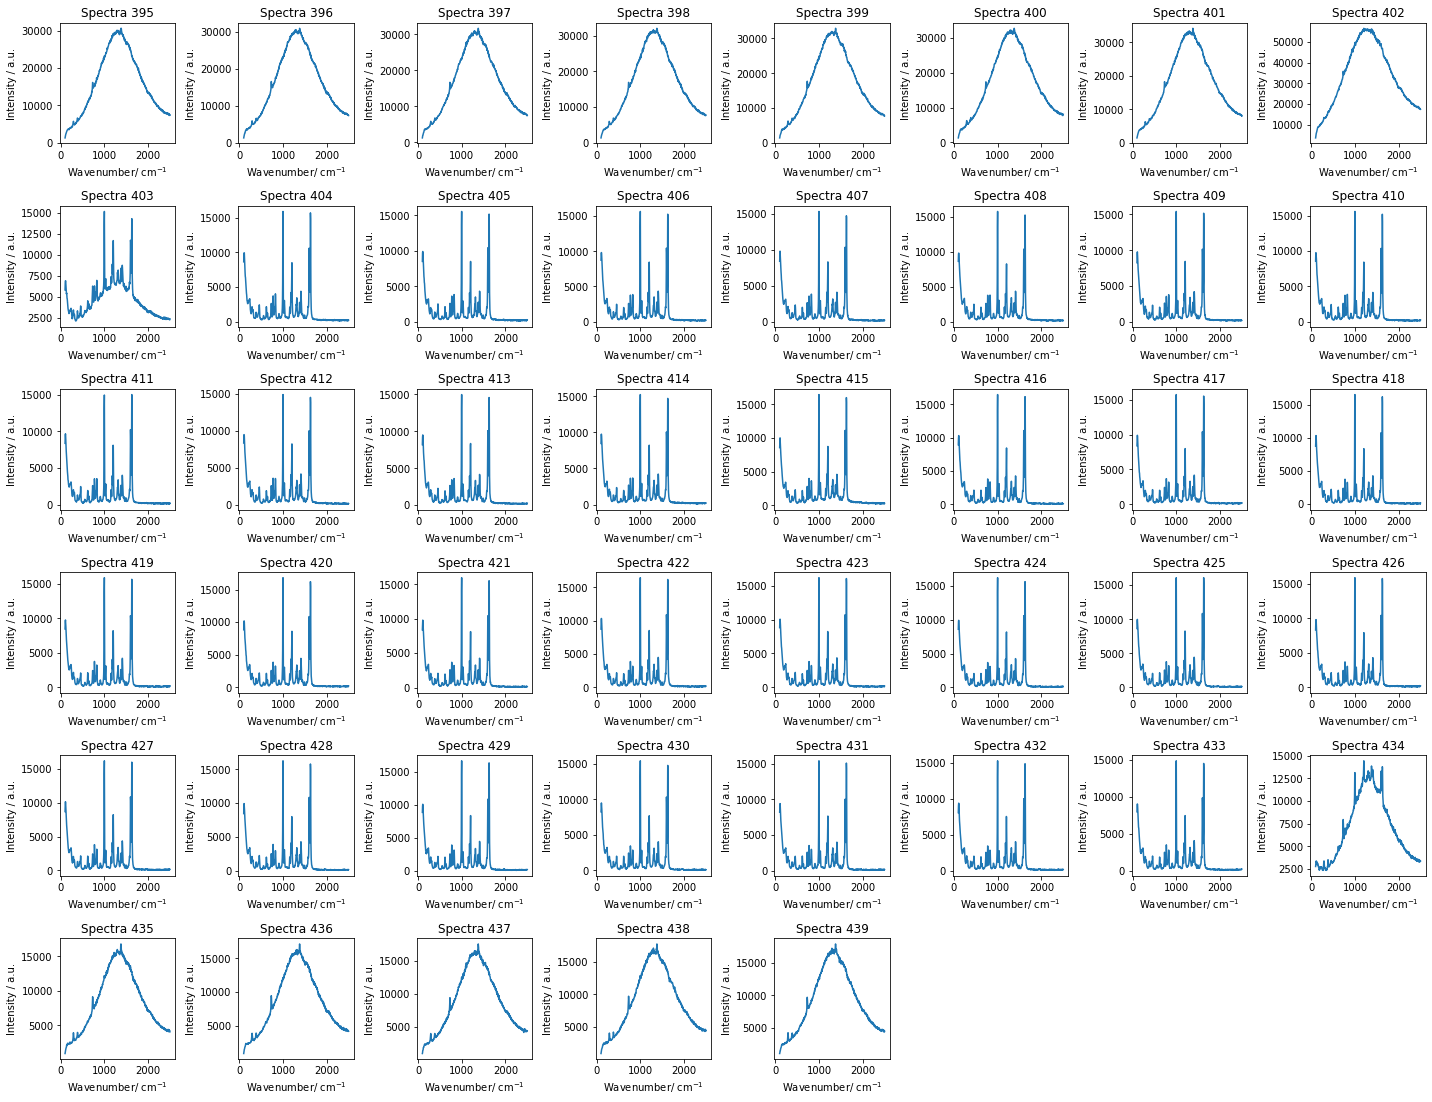

In [25]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(395, 440):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-394))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [26]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[420:429, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =16)
condition7_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
420,16,8819.0,9861.0,10178.0,9990.0,9021.0,8415.0,7567.0,7176.0,6690.0,...,140.0,185.0,94.0,204.0,131.0,153.0,51.0,158.0,135.0,177.0
421,16,8386.0,9357.0,9797.0,9483.0,8861.0,8143.0,7514.0,6823.0,6454.0,...,144.0,189.0,104.0,185.0,151.0,148.0,146.0,174.0,167.0,134.0
422,16,8717.0,9963.0,10321.0,10038.0,9134.0,8307.0,7837.0,7231.0,6641.0,...,95.0,158.0,119.0,206.0,131.0,154.0,93.0,124.0,101.0,164.0
423,16,8827.0,9915.0,10078.0,9711.0,9133.0,8208.0,7750.0,7044.0,6622.0,...,141.0,130.0,116.0,164.0,116.0,105.0,53.0,117.0,99.0,153.0
424,16,8591.0,9727.0,9912.0,9413.0,8760.0,8081.0,7643.0,6908.0,6419.0,...,192.0,108.0,143.0,121.0,114.0,128.0,126.0,141.0,195.0,119.0
425,16,8640.0,9646.0,9969.0,9498.0,9025.0,8469.0,7691.0,7057.0,6507.0,...,125.0,166.0,90.0,171.0,113.0,97.0,79.0,166.0,136.0,133.0
426,16,8303.0,9575.0,9798.0,9563.0,8648.0,8001.0,7400.0,6785.0,6501.0,...,75.0,185.0,114.0,230.0,77.0,163.0,139.0,175.0,108.0,176.0
427,16,8696.0,9708.0,10149.0,9857.0,9147.0,8423.0,7677.0,7016.0,6670.0,...,172.0,185.0,75.0,217.0,135.0,153.0,89.0,135.0,138.0,165.0
428,16,8437.0,9748.0,9920.0,9454.0,8996.0,8147.0,7649.0,7116.0,6592.0,...,126.0,122.0,77.0,174.0,129.0,129.0,72.0,131.0,124.0,141.0
429,16,8872.0,9807.0,10100.0,9690.0,8969.0,8400.0,7915.0,7148.0,6625.0,...,152.0,164.0,74.0,168.0,153.0,106.0,75.0,101.0,122.0,159.0


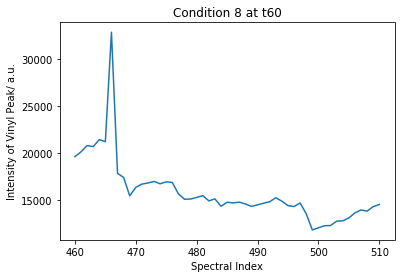

In [27]:
# Condition
df.loc[460:510,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8 at t60')
plt.show()

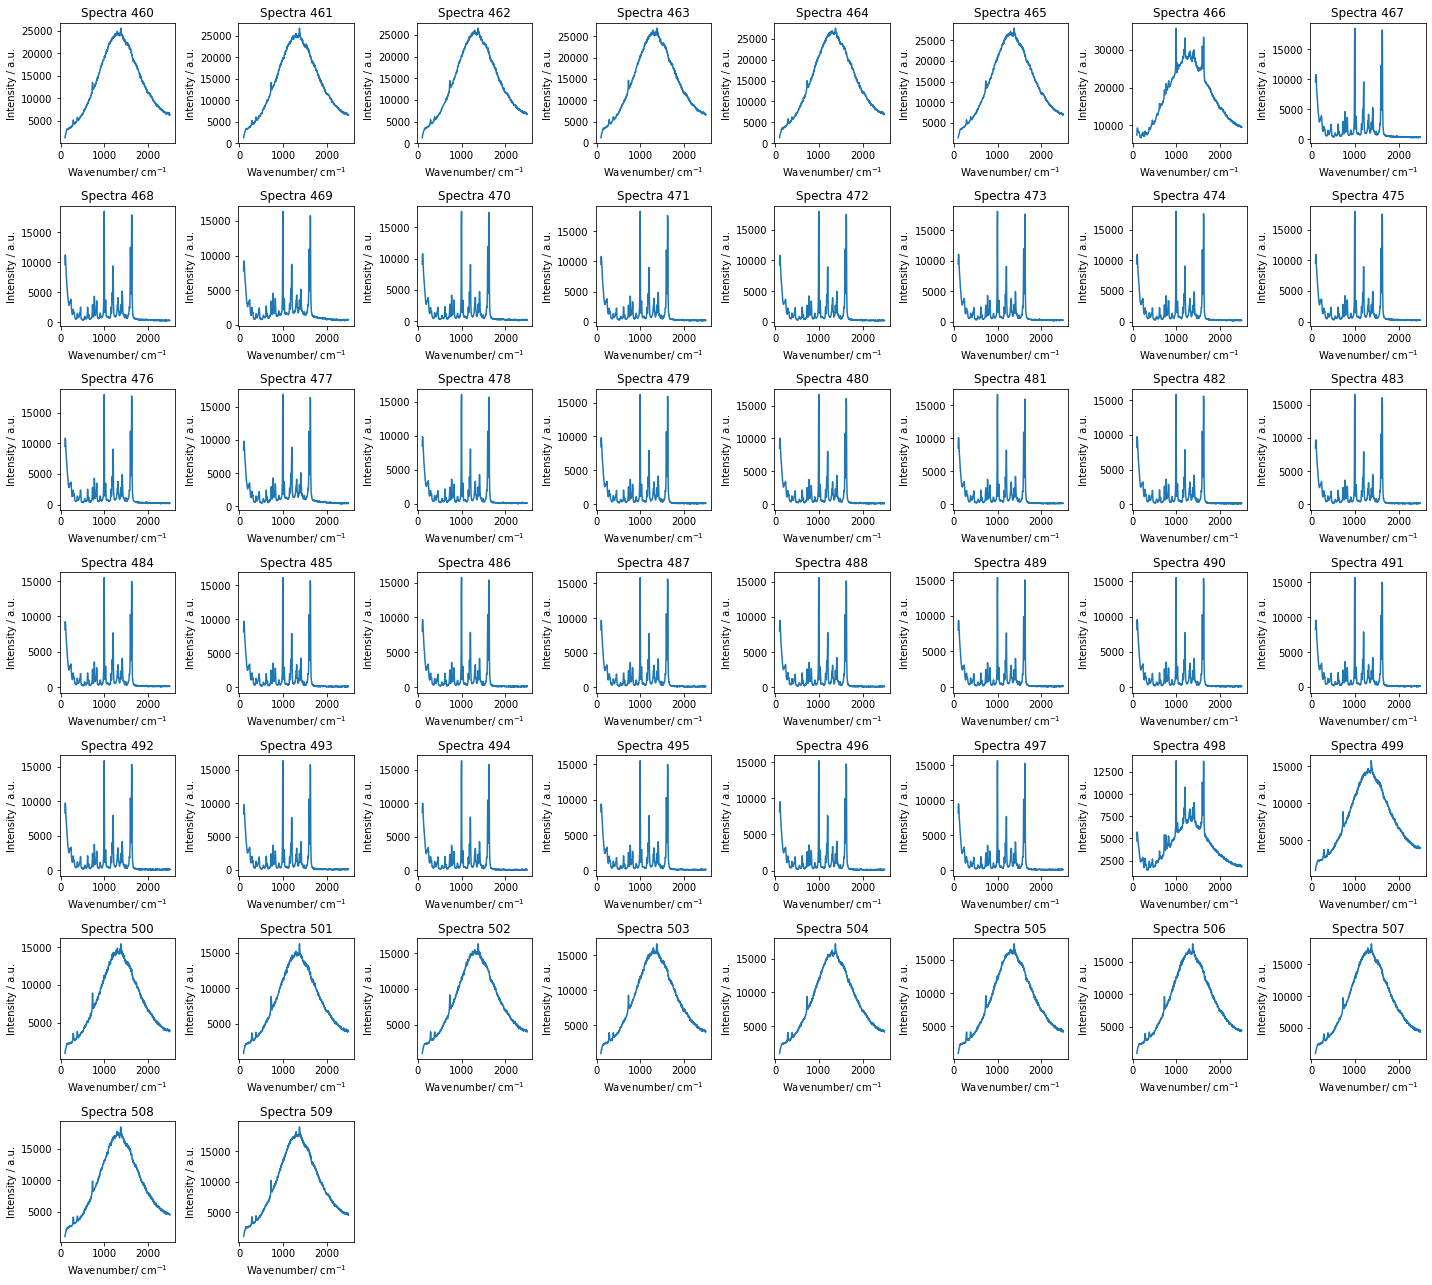

In [28]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(460, 510):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-459))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [29]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[480:489, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =17)
condition8_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
480,17,8498.0,9786.0,10033.0,9545.0,9136.0,8365.0,7622.0,7129.0,6680.0,...,139.0,153.0,70.0,183.0,69.0,152.0,37.0,181.0,75.0,173.0
481,17,8548.0,9702.0,10082.0,9710.0,8973.0,8318.0,7523.0,7195.0,6642.0,...,145.0,166.0,127.0,170.0,135.0,158.0,105.0,129.0,70.0,109.0
482,17,8187.0,9321.0,9737.0,9406.0,8625.0,8051.0,7301.0,6838.0,6204.0,...,106.0,189.0,133.0,190.0,113.0,169.0,83.0,180.0,116.0,148.0
483,17,8475.0,9598.0,9712.0,9614.0,8684.0,8010.0,7460.0,6867.0,6501.0,...,181.0,170.0,115.0,196.0,118.0,161.0,100.0,154.0,136.0,144.0
484,17,8128.0,9249.0,9164.0,9148.0,8276.0,7709.0,7285.0,6695.0,6149.0,...,123.0,148.0,178.0,200.0,97.0,106.0,82.0,102.0,143.0,111.0
485,17,8151.0,9245.0,9700.0,9408.0,8659.0,8053.0,7337.0,6971.0,6439.0,...,123.0,148.0,82.0,188.0,107.0,105.0,117.0,168.0,87.0,143.0
486,17,8067.0,9340.0,9670.0,9196.0,8556.0,8064.0,7368.0,6683.0,6254.0,...,125.0,184.0,128.0,174.0,125.0,159.0,78.0,190.0,91.0,181.0
487,17,8307.0,9188.0,9659.0,9311.0,8532.0,7966.0,7286.0,6672.0,6422.0,...,105.0,172.0,112.0,167.0,128.0,153.0,76.0,77.0,132.0,129.0
488,17,8013.0,9298.0,9502.0,9036.0,8629.0,7803.0,7162.0,6524.0,6164.0,...,121.0,146.0,148.0,152.0,146.0,135.0,80.0,167.0,130.0,158.0
489,17,8003.0,9106.0,9335.0,9062.0,8512.0,7934.0,7071.0,6620.0,6084.0,...,173.0,135.0,136.0,133.0,168.0,187.0,96.0,178.0,159.0,172.0


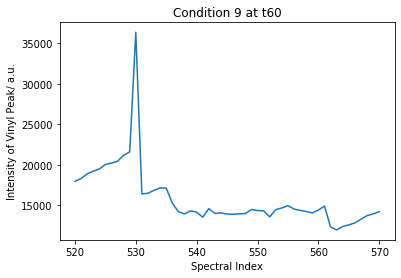

In [30]:
# Condition
df.loc[520:570,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9 at t60')
plt.show()

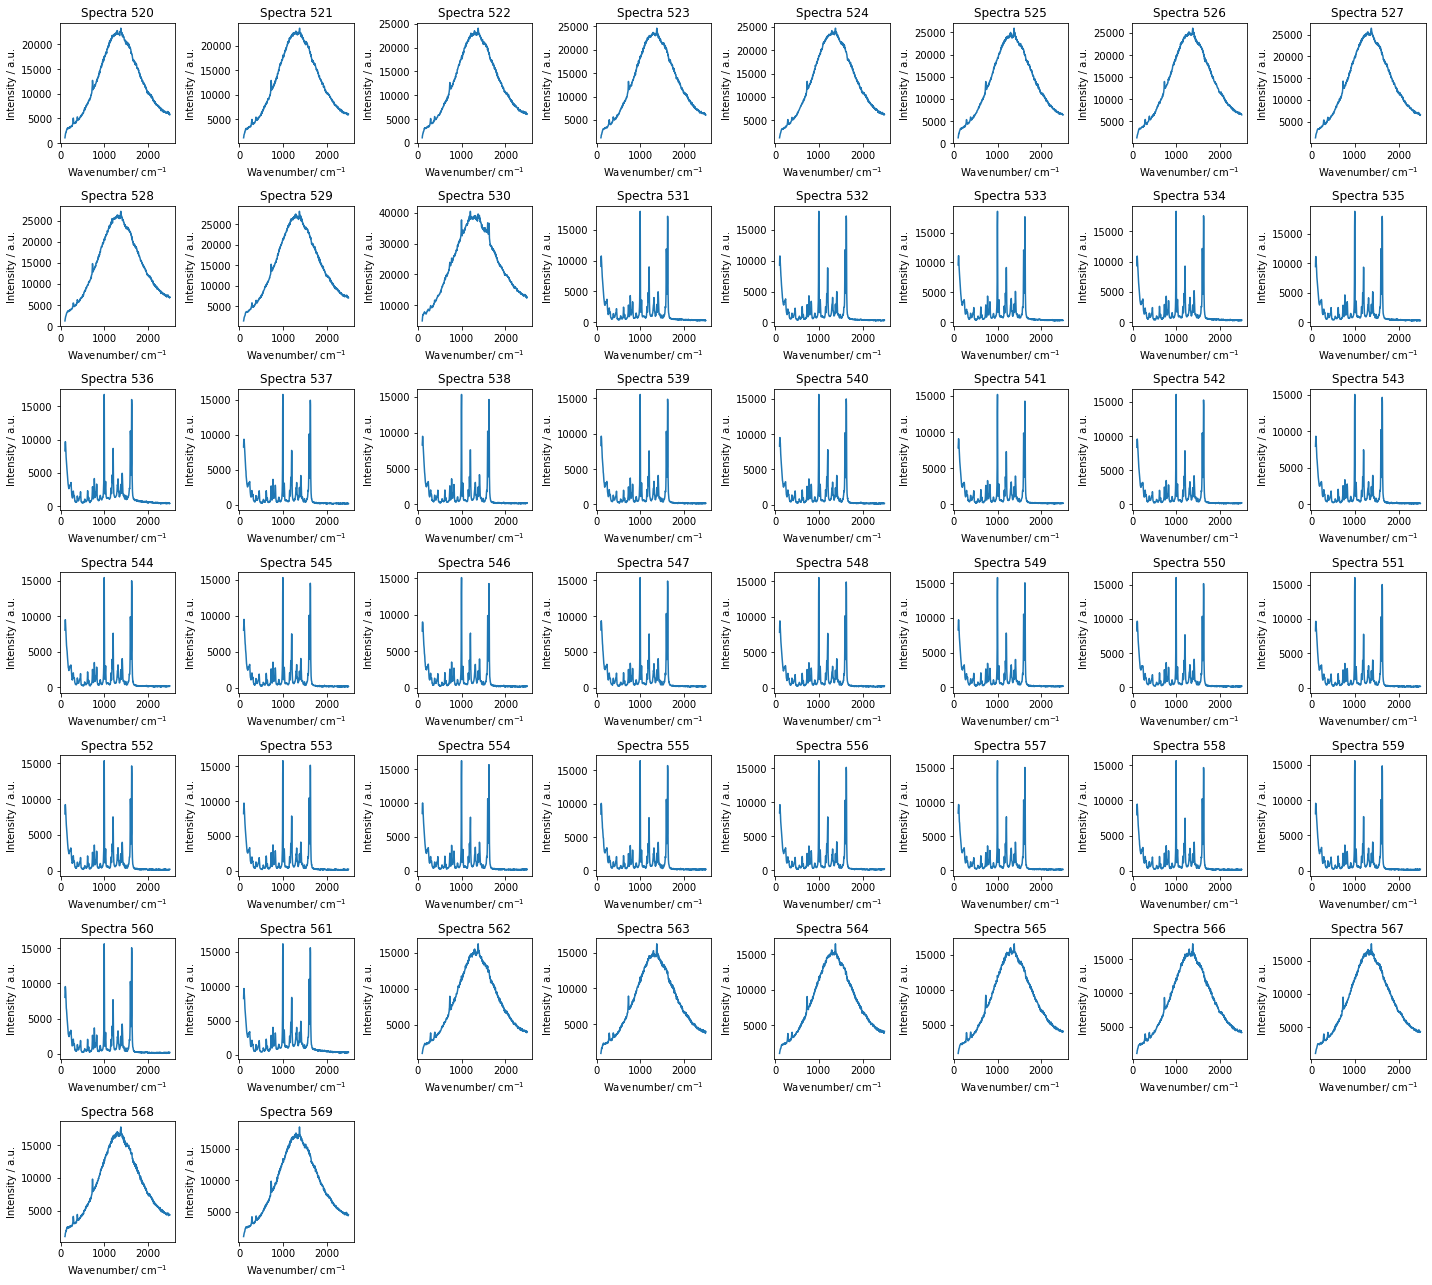

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(520, 570):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-519))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [32]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[550:559, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =18)
condition9_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
550,18,8248.0,9288.0,9661.0,9549.0,8540.0,8144.0,7243.0,6747.0,6308.0,...,205.0,235.0,103.0,243.0,172.0,209.0,127.0,118.0,207.0,202.0
551,18,8292.0,9535.0,9659.0,9276.0,8707.0,8151.0,7406.0,6765.0,6237.0,...,193.0,206.0,193.0,224.0,185.0,150.0,125.0,140.0,153.0,170.0
552,18,7945.0,8875.0,9244.0,8901.0,8256.0,7581.0,7027.0,6412.0,6129.0,...,146.0,196.0,125.0,214.0,136.0,153.0,136.0,181.0,183.0,196.0
553,18,8211.0,9283.0,9723.0,9338.0,8618.0,7952.0,7357.0,6802.0,6251.0,...,165.0,146.0,134.0,224.0,153.0,183.0,122.0,161.0,152.0,219.0
554,18,8454.0,9873.0,10005.0,9491.0,8651.0,8241.0,7468.0,7020.0,6630.0,...,177.0,226.0,176.0,213.0,155.0,176.0,163.0,178.0,149.0,221.0
555,18,8441.0,9862.0,10041.0,9731.0,8934.0,8426.0,7523.0,7124.0,6372.0,...,157.0,216.0,129.0,216.0,113.0,190.0,114.0,240.0,125.0,184.0
556,18,8482.0,9162.0,9671.0,9157.0,8533.0,7955.0,7194.0,6868.0,6412.0,...,228.0,192.0,156.0,210.0,179.0,194.0,133.0,168.0,192.0,218.0
557,18,8390.0,9146.0,9640.0,9539.0,8556.0,8049.0,7115.0,6956.0,6246.0,...,179.0,182.0,104.0,149.0,139.0,166.0,165.0,154.0,145.0,148.0
558,18,7959.0,9099.0,9462.0,8994.0,8271.0,7782.0,6985.0,6494.0,6143.0,...,145.0,197.0,203.0,177.0,186.0,241.0,120.0,200.0,180.0,196.0
559,18,8073.0,9538.0,9475.0,9041.0,8175.0,7759.0,7287.0,6722.0,6399.0,...,174.0,190.0,160.0,244.0,144.0,137.0,145.0,166.0,138.0,200.0


In [33]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
30,10,6743.0,7525.0,7902.0,7515.0,6888.0,6328.0,5620.0,5133.0,5020.0,...,56.0,128.0,55.0,185.0,118.0,146.0,60.0,112.0,119.0,119.0
31,10,6867.0,7522.0,7727.0,7552.0,6892.0,6280.0,5701.0,5322.0,4883.0,...,131.0,71.0,83.0,113.0,103.0,86.0,86.0,144.0,87.0,104.0
32,10,6795.0,7669.0,8008.0,7693.0,6802.0,6193.0,5786.0,5405.0,5086.0,...,110.0,133.0,93.0,156.0,122.0,84.0,82.0,74.0,130.0,140.0
33,10,6848.0,7864.0,8034.0,7616.0,7081.0,6524.0,5877.0,5433.0,4991.0,...,82.0,125.0,45.0,114.0,56.0,125.0,77.0,149.0,80.0,100.0
34,10,6953.0,7902.0,8122.0,7688.0,7021.0,6575.0,5973.0,5480.0,5131.0,...,107.0,117.0,72.0,116.0,115.0,100.0,95.0,101.0,141.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,18,8441.0,9862.0,10041.0,9731.0,8934.0,8426.0,7523.0,7124.0,6372.0,...,157.0,216.0,129.0,216.0,113.0,190.0,114.0,240.0,125.0,184.0
556,18,8482.0,9162.0,9671.0,9157.0,8533.0,7955.0,7194.0,6868.0,6412.0,...,228.0,192.0,156.0,210.0,179.0,194.0,133.0,168.0,192.0,218.0
557,18,8390.0,9146.0,9640.0,9539.0,8556.0,8049.0,7115.0,6956.0,6246.0,...,179.0,182.0,104.0,149.0,139.0,166.0,165.0,154.0,145.0,148.0
558,18,7959.0,9099.0,9462.0,8994.0,8271.0,7782.0,6985.0,6494.0,6143.0,...,145.0,197.0,203.0,177.0,186.0,241.0,120.0,200.0,180.0,196.0


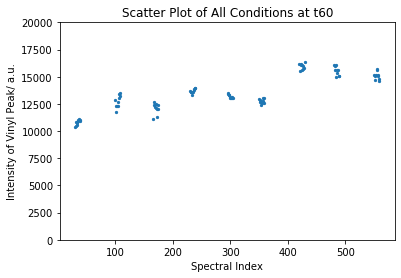

In [34]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t60')
plt.ylim(0, 20000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [35]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [36]:
# Inspect df_.
df_

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
30,10,6743.0,7525.0,7902.0,7515.0,6888.0,6328.0,5620.0,5133.0,5020.0,...,56.0,128.0,55.0,185.0,118.0,146.0,60.0,112.0,119.0,119.0
31,10,6867.0,7522.0,7727.0,7552.0,6892.0,6280.0,5701.0,5322.0,4883.0,...,131.0,71.0,83.0,113.0,103.0,86.0,86.0,144.0,87.0,104.0
32,10,6795.0,7669.0,8008.0,7693.0,6802.0,6193.0,5786.0,5405.0,5086.0,...,110.0,133.0,93.0,156.0,122.0,84.0,82.0,74.0,130.0,140.0
33,10,6848.0,7864.0,8034.0,7616.0,7081.0,6524.0,5877.0,5433.0,4991.0,...,82.0,125.0,45.0,114.0,56.0,125.0,77.0,149.0,80.0,100.0
34,10,6953.0,7902.0,8122.0,7688.0,7021.0,6575.0,5973.0,5480.0,5131.0,...,107.0,117.0,72.0,116.0,115.0,100.0,95.0,101.0,141.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,18,8441.0,9862.0,10041.0,9731.0,8934.0,8426.0,7523.0,7124.0,6372.0,...,157.0,216.0,129.0,216.0,113.0,190.0,114.0,240.0,125.0,184.0
556,18,8482.0,9162.0,9671.0,9157.0,8533.0,7955.0,7194.0,6868.0,6412.0,...,228.0,192.0,156.0,210.0,179.0,194.0,133.0,168.0,192.0,218.0
557,18,8390.0,9146.0,9640.0,9539.0,8556.0,8049.0,7115.0,6956.0,6246.0,...,179.0,182.0,104.0,149.0,139.0,166.0,165.0,154.0,145.0,148.0
558,18,7959.0,9099.0,9462.0,8994.0,8271.0,7782.0,6985.0,6494.0,6143.0,...,145.0,197.0,203.0,177.0,186.0,241.0,120.0,200.0,180.0,196.0


In [37]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.357641']].groupby('Condition').describe()

1629.357641                                                   \
                count     mean         std      min       25%      50%   
Condition                                                                
10               10.0  10477.7  328.706911  10021.0  10209.25  10498.5   
11               10.0  12370.8  402.972511  11756.0  12068.00  12300.0   
12               10.0  11703.0  454.472833  11045.0  11357.00  11857.5   
13               10.0  13140.0  260.501653  12715.0  13005.25  13211.0   
14               10.0  12650.0  102.822393  12447.0  12606.00  12685.5   
15               10.0  12230.0  226.251581  11910.0  12103.50  12163.5   
16               10.0  15303.8  360.257871  14831.0  15015.00  15334.0   
17               10.0  14803.4  378.982615  14301.0  14587.75  14746.0   
18               10.0  14334.7  369.835414  13552.0  14232.25  14349.0   

                              
                75%      max  
Condition                     
10         10794.50  10845.0  
11         12763.25  12912.0  
12         12088.25  12198.0  
13         13338.50  13457.0  
14         12709.50  12798.0  
15         12315.75  12671.0  
16         15473.00  16025.0  
17         15047.75  15449.0  
18         14497.50  14941.0

In [38]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201020 High Throughput Experiment Conditions 10 to 18\Online Raman\df_t60.csv')